#### 用Gauss-Newton法解最小二乘问题

$$ \min f(x) = \frac{1}{2}[(x+1)^2 + (\lambda x^2 + x -1)^2], x \in \mathbb{R}$$

问题当 $\lambda <1$ 时，有全局最优解 $x^* = 0$.
（教材5.2节 p.125 例5.1）

In [69]:
import numpy as np
import matplotlib.pyplot as plt

iter = 0
x0 = 0.99 # 初始点
eps = -40 # 终止条件

In [70]:
# 目标函数
def r(x, l):
    return np.array([x+1, l*x**2 + x - 1])

def f(x, l):
    return (1/2) * (r(x, l)[0]**2 + r(x, l)[1]**2)

def J(x, l):
    return np.array([1, 2*l*x+1])

注：最小二乘问题的目标函数表示为 $f(x) = \frac{1}{2} r(x)^T r(x)$ 的形式，$J(x)$ 是 $r(x)$ 的导数.

In [71]:
a = 1 # 基本步长
l = .1 # l for lambda (λ)
x = x0
path1, path2, path_lg = [], [], []
iter_bound = 40 # 最大迭代次数

Case1: $\lambda = 0.1$

In [72]:
l = 0.1
iter = 0
iter_bound = 18
while iter < iter_bound:
    J_k = J(x, l)
    r_k = r(x, l)

    path1.append(x)
    path2.append(f(x, l))
    path_lg.append(np.log10(np.abs(x)))

    if (np.log10(np.abs(x)) < eps) or (iter == iter_bound-1):
        print(iter, x, np.log10(np.abs(x)))
        break

    d = - (J_k[0]*r_k[0] + J_k[1]*r_k[1]) / (J_k[0]*J_k[0] + J_k[1]*J_k[1])
    x = x + a*d
    iter += 1

17 1.6148829491915684e-17 -16.791858950956698


当 $|\lambda| <1$ 时，此时 $\{x_k\}$ 是线性收敛:

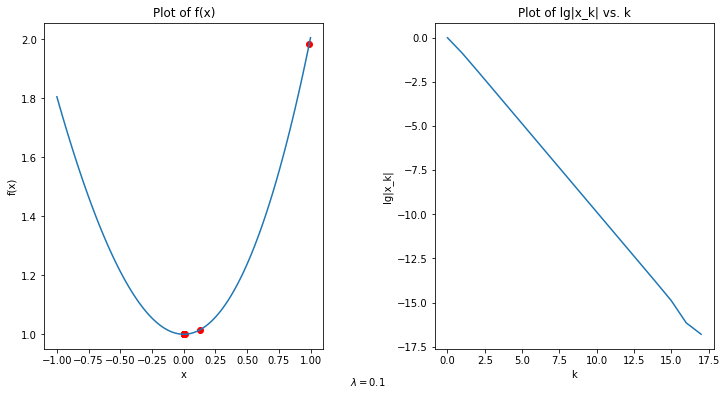

In [73]:
# 创建子图，将两张图左右排列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制 f(x) 的图像
x_vals = np.linspace(-1, 1, 100)  # 生成更多的 x 值用于绘图
f_vals = f(x_vals, l)  # 计算对应的 f(x) 值
ax1.plot(x_vals, f_vals)
ax1.scatter(path1, path2, c='r', label='x_k')  # 绘制 x_k 的点
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Plot of f(x)')

# 绘制 lg|x_k| 随 k 变化的图像
k_vals = np.arange(iter_bound)  # 迭代次数的取值范围
ax2.plot(k_vals, path_lg)
ax2.set_xlabel('k')  # x 轴标签
ax2.set_ylabel('lg|x_k|')  # y 轴标签
ax2.set_title('Plot of lg|x_k| vs. k')  # 图像标题

fig.text(0.5, 0.04, r'$\lambda = 0.1$', ha='center')
plt.subplots_adjust(wspace=0.4) # 调整子图之间的间距
plt.show()

Case2: $\lambda = -2$

In [74]:
l = -2
iter = 0
iter_bound = 40
path1, path2, path_lg = [], [], []
x = x0
while iter < iter_bound:
    J_k = J(x, l)
    r_k = r(x, l)

    path1.append(x)
    path2.append(f(x, l))
    path_lg.append(np.log10(np.abs(x)))

    if (np.log10(np.abs(x)) < eps) or (iter == iter_bound-1):
        print(iter, x, np.log10(np.abs(x)))
        break

    d = - (J_k[0]*r_k[0] + J_k[1]*r_k[1]) / (J_k[0]*J_k[0] + J_k[1]*J_k[1])
    x = x + a*d
    iter += 1

39 -0.09232336406695882 -1.0346883791331136


当 $\lambda <-1$ 时，$\{x_k\}$ 不再收敛:

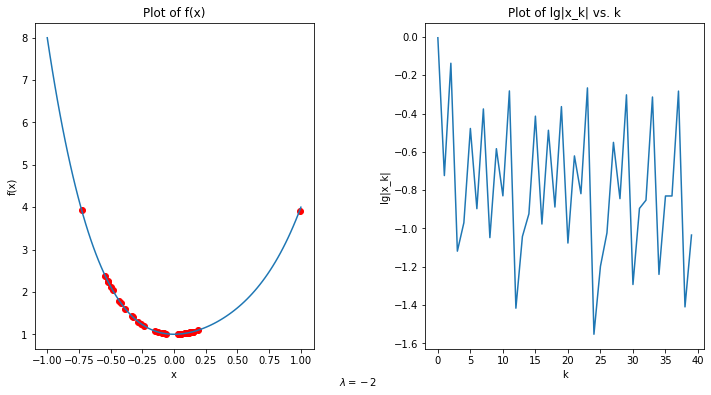

In [75]:
# 创建子图，将两张图左右排列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制 f(x) 的图像
x_vals = np.linspace(-1, 1, 100)  
f_vals = f(x_vals, l)  
ax1.plot(x_vals, f_vals)
ax1.scatter(path1, path2, c='r', label='x_k')  
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Plot of f(x)')

# 绘制 lg|x_k| 随 k 变化的图像
k_vals = np.arange(iter_bound)  
ax2.plot(k_vals, path_lg)
ax2.set_xlabel('k')  
ax2.set_ylabel('lg|x_k|')  
ax2.set_title('Plot of lg|x_k| vs. k')  

fig.text(0.5, 0.04, r'$\lambda = -2$', ha='center')
plt.subplots_adjust(wspace=0.4) 
plt.show()

Case3: $\lambda = 0$ 此时为线性最小二乘问题

In [76]:
l = 0
iter = 0
iter_bound = 40
path1, path2, path_lg = [], [], []
x = x0 = 0.9
while iter < iter_bound:
    J_k = J(x, l)
    r_k = r(x, l)

    path1.append(x)
    path2.append(f(x, l))
    path_lg.append(np.log10(np.abs(x)))

    if (np.log10(np.abs(x)) < eps) or (iter == iter_bound-1):
        print(iter, x, np.log10(np.abs(x)))
        break

    d = - (J_k[0]*r_k[0] + J_k[1]*r_k[1]) / (J_k[0]*J_k[0] + J_k[1]*J_k[1])
    x = x + a*d
    iter += 1

39 5.551115123125783e-17 -16.255619765854984


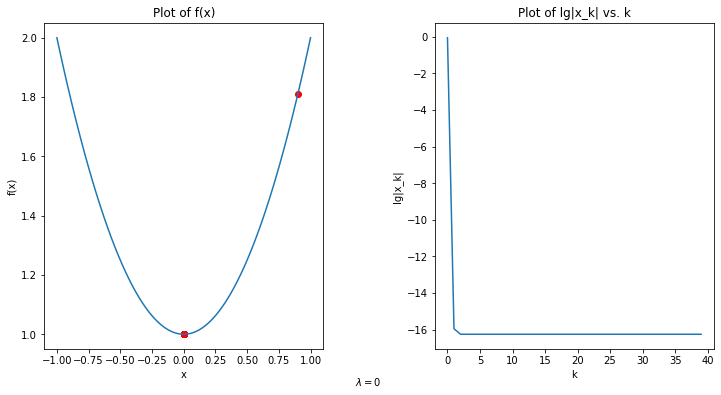

In [77]:
# 创建子图，将两张图左右排列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 绘制 f(x) 的图像
x_vals = np.linspace(-1, 1, 100)  
f_vals = f(x_vals, l)  
ax1.plot(x_vals, f_vals)
ax1.scatter(path1, path2, c='r', label='x_k')  
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.set_title('Plot of f(x)')

# 绘制 lg|x_k| 随 k 变化的图像
k_vals = np.arange(iter_bound)  
ax2.plot(k_vals, path_lg)
ax2.set_xlabel('k')  
ax2.set_ylabel('lg|x_k|')  
ax2.set_title('Plot of lg|x_k| vs. k')  

fig.text(0.5, 0.04, r'$\lambda = 0$', ha='center')
plt.subplots_adjust(wspace=0.4) 
plt.show()